# Nothing But NumPy: A 1-layer neural network with feature crosses

Part of the blog ["Nothing but NumPy: Understanding &amp; Creating neural networks with computational graphs from scratch"](https://medium.com/@rafayak/nothing-but-numpy-understanding-creating-neural-networks-with-computational-graphs-from-scratch-6299901091b0)- by [Rafay Khan](https://twitter.com/RafayAK)


In this notebook we'll create a 1-layer nueral network (i.e. just an output layer) and train it on the XOR data.


First, let's import NumPy, our layers and helper functions.

_Feel free to look into the helper functions in the `utils` directory_   

In [1]:
import numpy as np
from util.utilities import *
from Layers.LinearLayer import LinearLayer
from Layers.ActivationLayer import SigmoidLayer
# to show all the generated plots inline in the notebook
%matplotlib inline 

#### The XOR data:

![XOR_data_and_plot](architecture_imgs/XOR_data_n_plot.png)

In [2]:
# This is our XOR gate data 

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])


Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

Let's set up training data with a feature cross, $x_1*x_2$ .

In [3]:
X_train = X

# add feature cross between 1st and 2nd feature
X_train = np.c_[X_train, X[:, 0]* X[:, 1]]  # "np.c_" concatenates data column-wise

# now we can set up data in the shape required by the neural net layers
X_train = X_train.T
Y_train = Y.T

Let's see if the data looks as desired

In [4]:
X_train

array([[0, 0, 1, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 1]])

In [5]:
Y_train

array([[0, 1, 1, 0]])

Recall, our neural net architecture with a feature cross from the blog, we'll recreate it here.


![A one layer neural network with a feature cross](architecture_imgs/1_layer_FeatEng_NN.png)

In [6]:
# define training constants
learning_rate = 1
number_of_epochs = 5000

np.random.seed(48) # set seed value so that the results are reproduceable

# Our network architecture has the shape: 
#                       (input)--> [Linear->Sigmoid] -->(output)  


#------ LAYER-1 ----- define output layer that takes in training data 
Z1 = LinearLayer(input_shape=X_train.shape, n_out=1, ini_type='plain')
A1 = SigmoidLayer(Z1.Z.shape)

Now we can start the training loop.

In [7]:
costs = [] # initially empty list, this will store all the costs after a certian number of epochs

# Start training
for epoch in range(number_of_epochs):
    
    # ------------------------- forward-prop -------------------------
    Z1.forward(X_train)
    A1.forward(Z1.Z)
    
    # ---------------------- Compute Cost ----------------------------
    cost, dA1 = compute_cost(Y=Y_train, Y_hat=A1.A)
    
    # print and store Costs every 100 iterations.
    if (epoch % 100) == 0:
        print("Cost at epoch#{}: {}".format(epoch, cost))
        costs.append(cost)
    
    # ------------------------- back-prop ---------------------------- 
    A1.backward(dA1)
    Z1.backward(A1.dZ)
    
    # ----------------------- Update weights and bias ----------------
    Z1.update_params(learning_rate=learning_rate)

Cost at epoch#0: 0.12480797532784463
Cost at epoch#100: 0.07434908897603773
Cost at epoch#200: 0.05055711748473411
Cost at epoch#300: 0.03643262431082579
Cost at epoch#400: 0.027671514044586787
Cost at epoch#500: 0.021929157273732916
Cost at epoch#600: 0.017964599404664255
Cost at epoch#700: 0.015104029541185851
Cost at epoch#800: 0.012963350559412182
Cost at epoch#900: 0.011312406038651465
Cost at epoch#1000: 0.010006868961998287
Cost at epoch#1100: 0.008952547095911286
Cost at epoch#1200: 0.008085796422895312
Cost at epoch#1300: 0.007362297621780561
Cost at epoch#1400: 0.006750366883673308
Cost at epoch#1500: 0.006226826400730868
Cost at epoch#1600: 0.00577437381840124
Cost at epoch#1700: 0.005379859016917353
Cost at epoch#1800: 0.005033126690065441
Cost at epoch#1900: 0.004726221322649468
Cost at epoch#2000: 0.004452829962544101
Cost at epoch#2100: 0.004207884472650881
Cost at epoch#2200: 0.00398727288191886
Cost at epoch#2300: 0.0037876267299368407
Cost at epoch#2400: 0.00360616222

`predict` helper function returns three things:
- `p`: predicted labels (output 1 if predictded output is greater than 0.5) 
- `probas`: raw probabilities (how sure the neural net thinks the output is 1, this is just Y_hat) 
- `accuracy`: the number of correct predictions from total predictions

In the cell below we are not storing `probas`( pythonic way is to use `_` it its place)  

In [8]:
# see the ouptput predictions
predicted_outputs, _, accuracy = predict(X=X_train, Y=Y_train, Zs=[Z1], As=[A1])

print("The predicted outputs:\n {}".format(predicted_outputs))
print("The accuracy of the model is: {}%".format(accuracy))

The predicted outputs:
 [[ 0.  1.  1.  0.]]
The accuracy of the model is: 100.0%


#### The learning curve

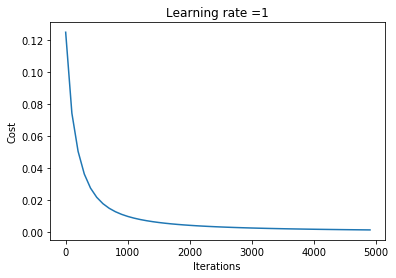

In [9]:
plot_learning_curve(costs=costs, learning_rate=learning_rate, total_epochs=number_of_epochs)

#### The decision boundary

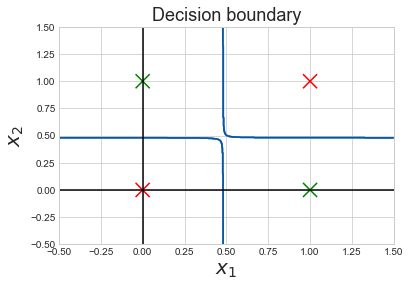

In [10]:
plot_decision_boundary(lambda x:predict_dec(Zs=[Z1], As=[A1], X=x.T), X_train.T, Y_train.T, feat_crosses=[(0,1)])

#### The shaded decision boundary

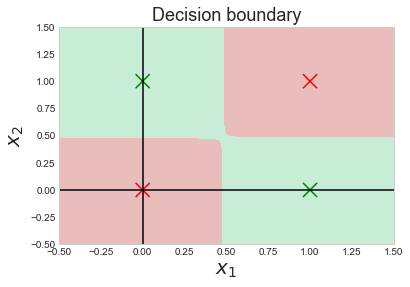

In [11]:
plot_decision_boundary_shaded(lambda x:predict_dec(Zs=[Z1], As=[A1], X=x.T), X_train.T, Y_train.T, feat_crosses=[(0,1)])